# 비대칭 데이터 문제
- https://imbalanced-learn.org/stable/over_sampling.html
-https://datascienceschool.net/03%20machine%20learning/14.02%20%EB%B9%84%EB%8C%80%EC%B9%AD%20%EB%8D%B0%EC%9D%B4%ED%84%B0%20%EB%AC%B8%EC%A0%9C.html

In [ ]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')
plt.rcParams['font.family']='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False
import numpy as np
import pandas as pd

findfont: Font family ['Malgun Gothic'] not found. Falling back to DejaVu Sans.


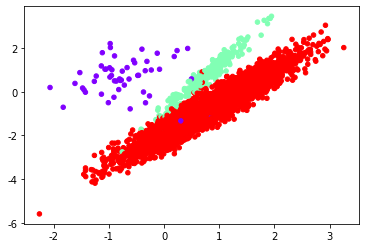

In [ ]:
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=5000, n_features=2, n_informative=2,
                           n_redundant=0, n_repeated=0, 
                           n_classes=3,
                           n_clusters_per_class=1,
                           weights=[0.01, 0.05, 0.94],
                           class_sep=0.8, random_state=0)
plt.scatter(X[:, 0], X[:, 1], c=y, s=20, cmap='rainbow')

## SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE
from collections import Counter
print(f'normal data distribution: {Counter(y)}')
X_smote, y_smote = SMOTE().fit_resample(X,y)
print(f'SMOTE data distribution: {Counter(y_smote)}')

normal data distribution: Counter({2: 4674, 1: 262, 0: 64})
SMOTE data distribution: Counter({2: 4674, 1: 4674, 0: 4674})


## 원래 데이터로 예측

In [ ]:
from sklearn import model_selection, metrics
from imblearn.pipeline import make_pipeline
from sklearn.svm import LinearSVC
clf = LinearSVC()
kf = model_selection.KFold(n_splits=3, shuffle=True, random_state=11)

model_selection.cross_validate(clf, X, y, scoring='recall_macro', cv=kf)
print('\n')
model_selection.cross_val_score(clf, X, y, scoring='recall_macro', cv=kf)

{'fit_time': array([0.09165192, 0.07029748, 0.03877997]),
 'score_time': array([0.00291562, 0.00229311, 0.00227094]),
 'test_score': array([0.69340238, 0.56378601, 0.59348149])}

array([0.69340238, 0.56378601, 0.59348149])

## Data over-under-combine

In [ ]:
from imblearn.over_sampling import *
oversamplers = [RandomOverSampler(random_state=0), ADASYN(random_state=0),
                SMOTE(random_state=42)]
                
for sampler in oversamplers :
    imba_pipeline= make_pipeline(sampler, clf)
    model_selection.cross_val_score(imba_pipeline, X, y, scoring='recall_macro', cv=kf)
    print('\n')

array([0.8378122 , 0.82726718, 0.82383264])

array([0.53418115, 0.5825033 , 0.71177491])

array([0.84221685, 0.83272696, 0.82319038])

In [ ]:
borderline_smote = [BorderlineSMOTE(random_state=13), SVMSMOTE(random_state=11)]
for sampler in borderline_smote :
    imba_pipeline= make_pipeline(sampler, clf)
    model_selection.cross_val_score(imba_pipeline, X, y, scoring='recall_macro', cv=kf)
    print('\n')

array([0.82447722, 0.86502517, 0.87378737])

array([0.8946434 , 0.91022688, 0.88909526])

In [ ]:
from imblearn.under_sampling import *
undersamplers = [RandomUnderSampler(), TomekLinks(), OneSidedSelection()]
for sampler in undersamplers :
    imba_pipeline= make_pipeline(sampler, clf)
    model_selection.cross_val_score(imba_pipeline, X, y, scoring='recall_macro', cv=kf)
    print('\n')

array([0.83716828, 0.8149215 , 0.8212636 ])

array([0.71716125, 0.57201646, 0.61246442])

array([0.77106196, 0.77609428, 0.73729387])

In [ ]:
from imblearn.combine import *
combinesamplers = [SMOTEENN(random_state=0), SMOTETomek(random_state=4)]
for sampler in combinesamplers :
    imba_pipeline= make_pipeline(sampler, clf)
    model_selection.cross_val_score(imba_pipeline, X, y, scoring='recall_macro', cv=kf)
    print('\n')

array([0.86445475, 0.86012321, 0.83558527])

array([0.84414859, 0.83571076, 0.82468899])

# RandomForest 복습
https://mlu-explain.github.io/
### Randomforest Ensemble

# Ensemble of samplers
## Classifier including inner balancing samplers
https://imbalanced-learn.org/stable/ensemble.html
###  Bagging classifier

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from imblearn.ensemble import BalancedRandomForestClassifier
from imblearn.ensemble import RUSBoostClassifier

bag = BaggingClassifier(base_estimator=DecisionTreeClassifier(), random_state=0) 
brf = BalancedRandomForestClassifier(n_estimators=100, random_state=0)
rusboost = RUSBoostClassifier(n_estimators=200, algorithm='SAMME.R',
                              random_state=0)

for classifier in [bag, brf, rusboost] :
    model_selection.cross_val_score(classifier, X, y, scoring='recall_macro', cv=kf)
    print('\n')

array([0.86744119, 0.88333391, 0.85821205])

array([0.88380873, 0.88856932, 0.85341355])

array([0.55950734, 0.51173524, 0.57998663])

# End